In [37]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup # Library for webscrabing
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
# import k-means from clustering stage
from sklearn.cluster import KMeans

import warnings  
warnings.filterwarnings("ignore")  # library to ignore warnings
#!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Loading Datasets

In [5]:
## Load the new dataset
df_1 = pd.read_csv('..\datasets\df_venues2022.csv')
df_2 = pd.read_csv('..\datasets\competitors.csv')

In [6]:
df= pd.merge(df_1,df_2,how='inner',on='District')

In [7]:
df.head()

,District,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Burger King,Mc Donalds,KFC
0,Adalar,16372,11,1482,6652,79821,40.872361,29.130448,10,4,4,48,17,50,52,10,20,97,0,0,0
1,Arnavutköy,312023,450,693,2030,24360,41.184471,28.741245,16,25,9,81,10,48,102,22,96,11,5,0,0
2,Ataşehir,427217,25,16933,6577,78924,40.984749,29.106720,30,91,7,190,36,106,165,69,102,56,8,3,6
3,Avcılar,457981,42,10902,3662,43938,40.980135,28.717547,43,56,11,210,77,100,109,40,90,70,4,2,2
4,Bağcılar,744351,22,33289,3197,38367,41.033899,28.857898,49,82,17,129,33,115,103,30,91,27,6,2,2


In [8]:
df.loc[:,['Latitude','Longitude']].rename(columns = {'Latitude':'lat','Longitude':'lon'}).to_csv('location.csv',index=False)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,39.0,406176.923077,207575.392283,16372.000000,278983.500000,398122.000000,498169.500000,977489.000000
Area,39.0,136.564103,250.563239,7.000000,17.000000,37.000000,131.000000,1115.000000
Density,39.0,14529.410256,12273.795421,53.000000,2148.000000,11993.000000,24413.000000,41930.000000
Mensual_Household_Income,39.0,4433.128205,2095.834430,2030.000000,3039.500000,3662.000000,5027.000000,10560.000000
Annual_Income,39.0,52231.179487,26224.227805,6036.000000,36258.000000,43938.000000,60326.500000,126720.000000
Latitude,39.0,39.369139,11.756466,-31.761336,40.989845,41.028423,41.067760,47.667920
Longitude,39.0,26.017042,16.188768,-71.318770,28.761067,28.915650,29.072218,35.627761
Arts & Entertainment,39.0,32.282051,30.077924,0.000000,10.000000,30.000000,43.000000,137.000000
College & University,39.0,41.820513,28.274846,0.000000,15.500000,41.000000,62.500000,96.000000
Event,39.0,7.153846,4.659673,0.000000,4.000000,6.000000,10.000000,18.000000


In [10]:
df.head()

,District,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Burger King,Mc Donalds,KFC
0,Adalar,16372,11,1482,6652,79821,40.872361,29.130448,10,4,4,48,17,50,52,10,20,97,0,0,0
1,Arnavutköy,312023,450,693,2030,24360,41.184471,28.741245,16,25,9,81,10,48,102,22,96,11,5,0,0
2,Ataşehir,427217,25,16933,6577,78924,40.984749,29.106720,30,91,7,190,36,106,165,69,102,56,8,3,6
3,Avcılar,457981,42,10902,3662,43938,40.980135,28.717547,43,56,11,210,77,100,109,40,90,70,4,2,2
4,Bağcılar,744351,22,33289,3197,38367,41.033899,28.857898,49,82,17,129,33,115,103,30,91,27,6,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   District                     39 non-null     object 
 1   Population                   39 non-null     int64  
 2   Area                         39 non-null     int64  
 3   Density                      39 non-null     int64  
 4   Mensual_Household_Income     39 non-null     int64  
 5   Annual_Income                39 non-null     int64  
 6   Latitude                     39 non-null     float64
 7   Longitude                    39 non-null     float64
 8   Arts & Entertainment         39 non-null     int64  
 9   College & University         39 non-null     int64  
 10  Event                        39 non-null     int64  
 11  Food                         39 non-null     int64  
 12  Nightlife Spot               39 non-null     int64  
 13  Outdoors & Recreation 

### Creating Total Venues Column

In [12]:
venues_list = ["Arts & Entertainment","College & University","Event","Food","Nightlife Spot","Outdoors & Recreation","Professional & Other Places","Residence","Shop & Service","Travel & Transport"]

In [13]:
df["Total_Venues"] = df.loc[:,venues_list].sum(axis=1)

In [14]:
df['Total_Competitors'] = df['Burger King'] + df['Mc Donalds'] + df['KFC']

In [15]:
df.head()

,District,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Burger King,Mc Donalds,KFC,Total_Venues,Total_Competitors
0,Adalar,16372,11,1482,6652,79821,40.872361,29.130448,10,4,4,48,17,50,52,10,20,97,0,0,0,312,0
1,Arnavutköy,312023,450,693,2030,24360,41.184471,28.741245,16,25,9,81,10,48,102,22,96,11,5,0,0,420,5
2,Ataşehir,427217,25,16933,6577,78924,40.984749,29.106720,30,91,7,190,36,106,165,69,102,56,8,3,6,852,17
3,Avcılar,457981,42,10902,3662,43938,40.980135,28.717547,43,56,11,210,77,100,109,40,90,70,4,2,2,806,8
4,Bağcılar,744351,22,33289,3197,38367,41.033899,28.857898,49,82,17,129,33,115,103,30,91,27,6,2,2,676,10


## Exploratory Data Analysis

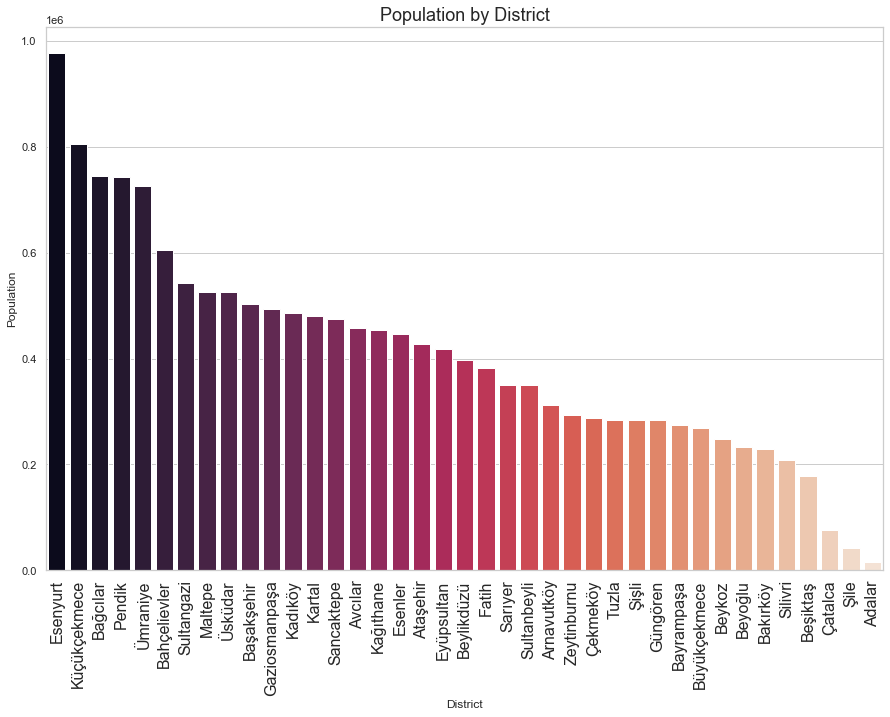

In [38]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Population',data = df,order= df.sort_values('Population',ascending=False).District,palette='rocket')
plt.title('Population by District',fontsize=18)
plt.show()

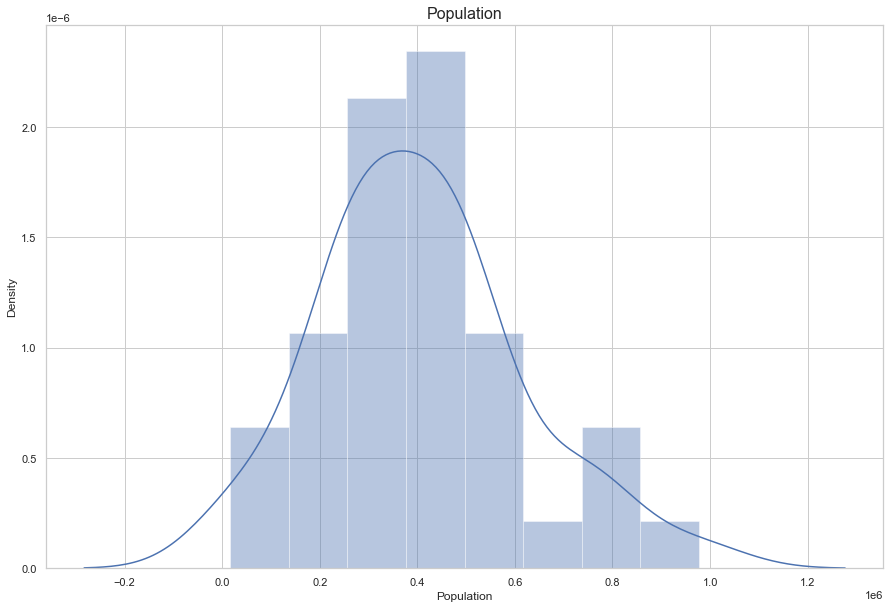

In [39]:
plt.figure(figsize=(15,10))
sns.distplot(df.Population)
plt.title('Population',fontsize=16)
plt.show()

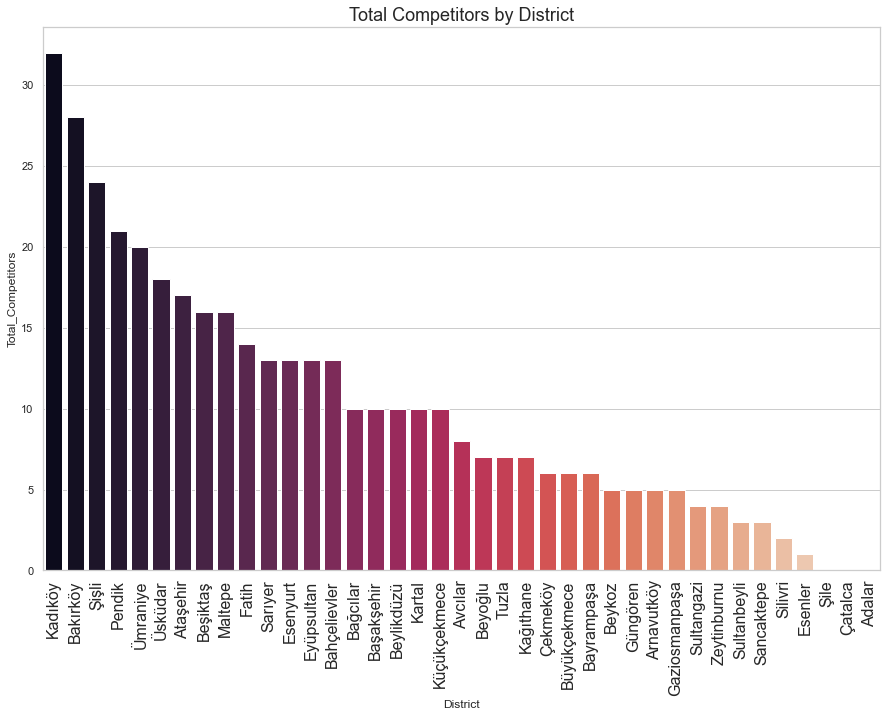

In [49]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Total_Competitors',data = df,order= df.sort_values('Total_Competitors',ascending=False).District,palette='rocket')
plt.title('Total Competitors by District',fontsize=18)
plt.show()

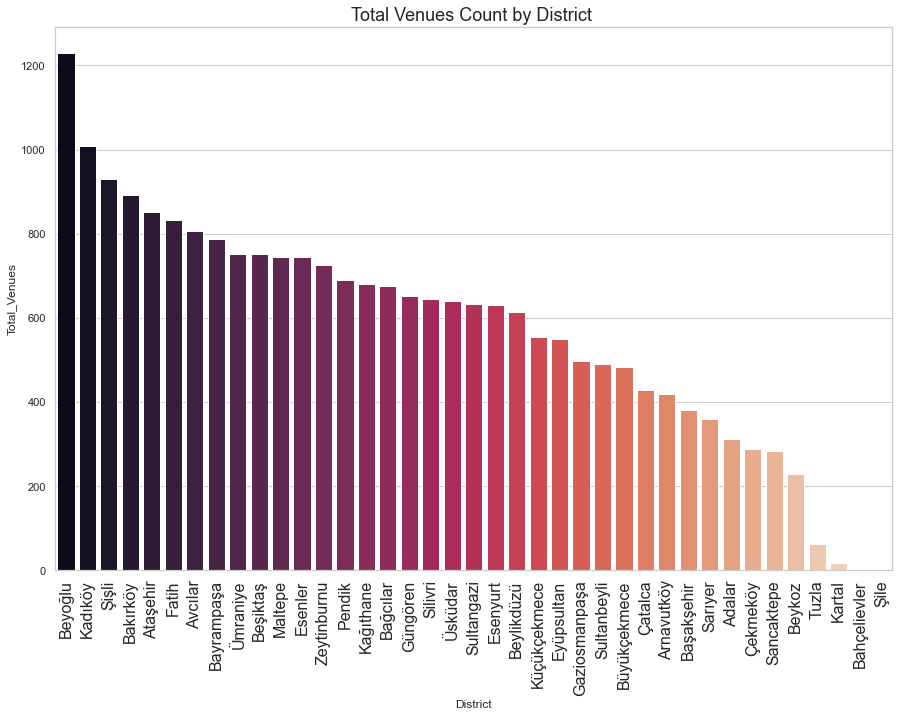

In [46]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Total_Venues',data = df,order= df.sort_values('Total_Venues',ascending=False).District,palette='rocket')
plt.title('Total Venues Count by District ',fontsize=18)
plt.show()

In [20]:
pl

,District,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Burger King,Mc Donalds,KFC,Total_Venues,Total_Competitors
0,Adalar,16372,11,1482,6652,79821,40.872361,29.130448,10,4,4,48,17,50,52,10,20,97,0,0,0,312,0
1,Arnavutköy,312023,450,693,2030,24360,41.184471,28.741245,16,25,9,81,10,48,102,22,96,11,5,0,0,420,5
2,Ataşehir,427217,25,16933,6577,78924,40.984749,29.106720,30,91,7,190,36,106,165,69,102,56,8,3,6,852,17
3,Avcılar,457981,42,10902,3662,43938,40.980135,28.717547,43,56,11,210,77,100,109,40,90,70,4,2,2,806,8
4,Bağcılar,744351,22,33289,3197,38367,41.033899,28.857898,49,82,17,129,33,115,103,30,91,27,6,2,2,676,10


In [63]:
df.to_csv('df_final.csv',index=False)

<AxesSubplot:>

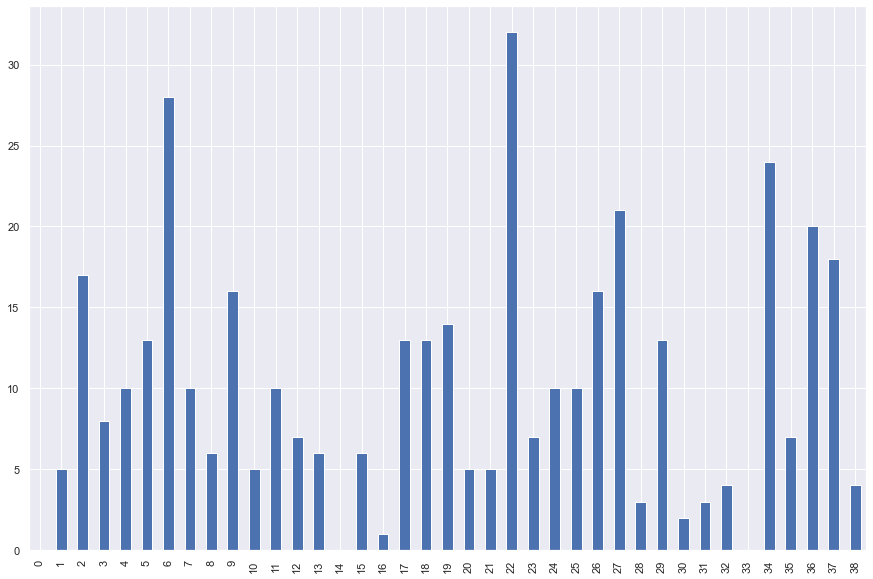

In [23]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Total_Competitors',data = df,order= df.sort_values('Total_Competitors',ascending=False).District,palette='rocket')
plt.title('Population by Total Venue',fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Total_Competitors',data = df,order= df.sort_values('Total_Competitors',ascending=False).District,palette='rocket')
plt.title('Total Venue Count by District ',fontsize=18)
plt.show()

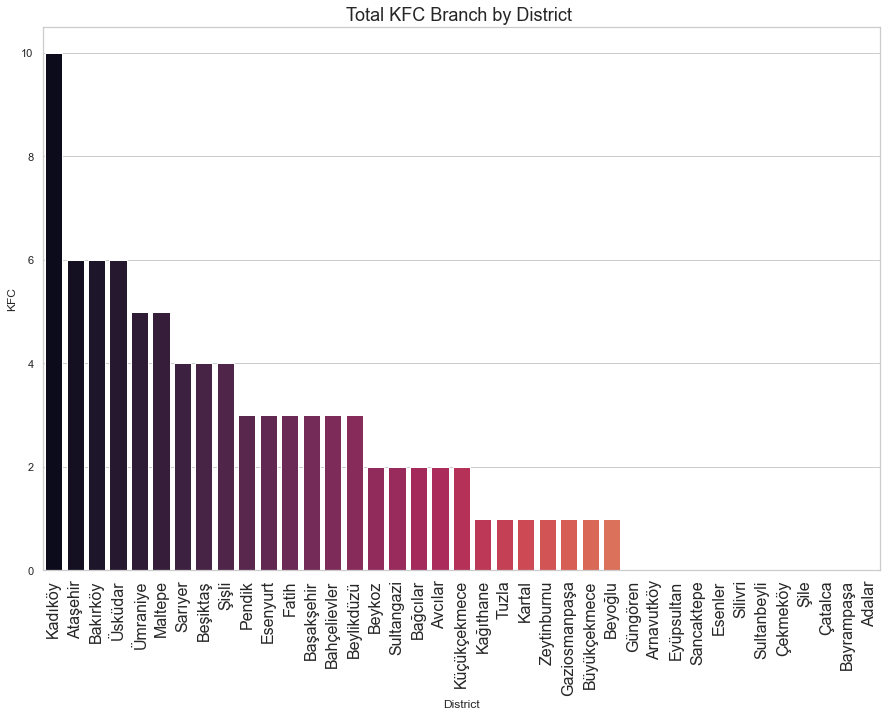

In [52]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='KFC',data = df,order= df.sort_values('KFC',ascending=False).District,palette='rocket')
plt.title('Total KFC Branch by District ',fontsize=18)
plt.show()

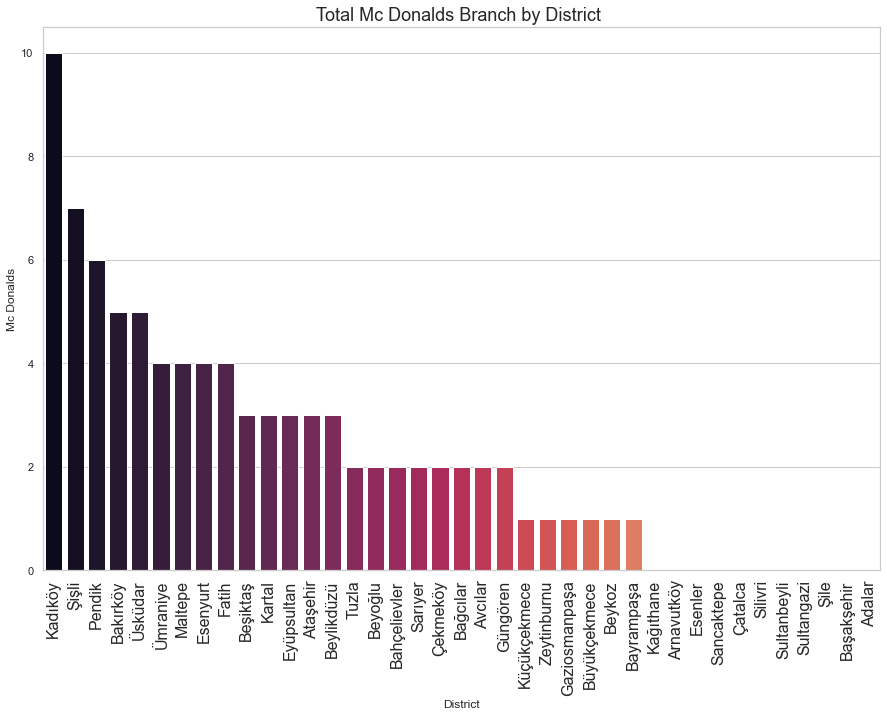

In [47]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Mc Donalds',data = df,order= df.sort_values('Mc Donalds',ascending=False).District,palette='rocket')
plt.title('Total Mc Donalds Branch by District ',fontsize=18)
plt.show()

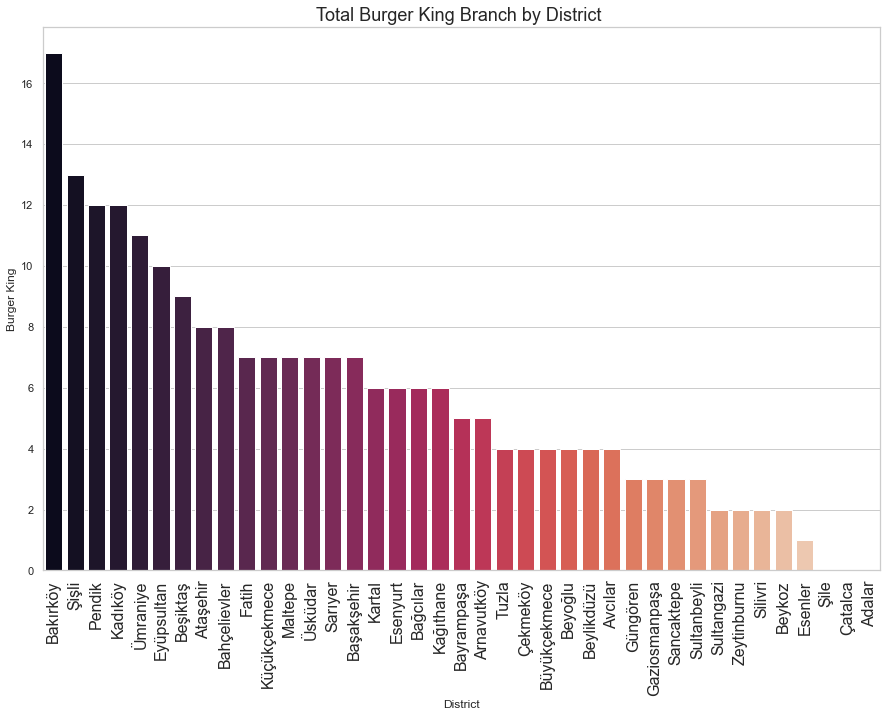

In [51]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =90,fontsize=16)
sns.barplot(x='District',y='Burger King',data = df,order= df.sort_values('Burger King',ascending=False).District,palette='rocket')
plt.title('Total Burger King Branch by District ',fontsize=18)
plt.show()

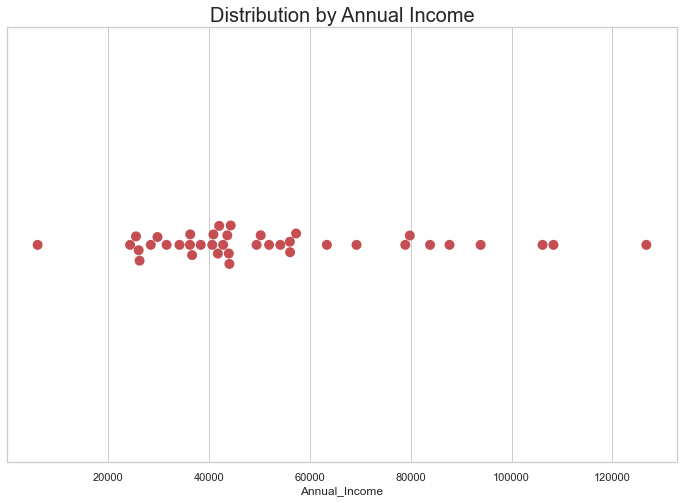

In [55]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Annual_Income',data=df,s=10,color='r')
plt.title('Distribution by Annual Income',fontsize=20)
plt.show()

(array([ 3.,  1., 11.,  5.,  9.,  4.,  1.,  3.,  1.,  1.]),
 array([ 16372. , 112483.7, 208595.4, 304707.1, 400818.8, 496930.5,
        593042.2, 689153.9, 785265.6, 881377.3, 977489. ]),
 <BarContainer object of 10 artists>)

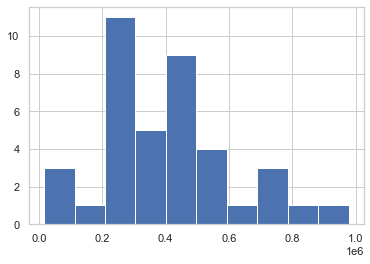

In [58]:
plt.hist(df.Population,bins=10)